In [2]:
import aiohttp

In [23]:
import random

In [24]:
low_calories_food = ('cucumber', 
                     'tomato', 
                     'cabbage', 
                     'apple', 
                     'Greek yogurt', 
                     'carrot', 
                     'broccoly', 
                     'spinach'
                     )

In [32]:
random.sample(low_calories_food, k=3)

['apple', 'Greek yogurt', 'cabbage']

In [33]:
from matplotlib import pyplot as plt

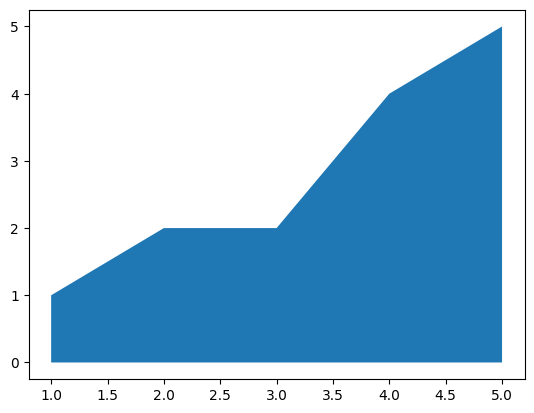

In [37]:
plt.fill_between([1, 2, 3, 4, 5], [1, 2, 2, 4, 5])

In [7]:
query = 'banana'

In [1]:
KEY = 'iy07rofO0aMXTWOyhB5PakupvUA7KoOe6Pwx2Gdx'

In [21]:
async def get_food_info_usda(product_name: str, api_key: str):
    url = f"https://api.nal.usda.gov/fdc/v1/foods/search?api_key={api_key}&query={product_name}"
    
    try:
        async with aiohttp.ClientSession() as session:
            async with session.get(url) as response:
                if response.status == 200:
                    data = await response.json()
                    foods = data.get('foods', [])
                    if foods:
                        first_food = foods[0]
                        nutrients = first_food.get('foodNutrients', [])
                        for nutrient in nutrients:
                            if nutrient.get('nutrientName') == 'Energy':
                                return nutrient.get('value', 0)
    except aiohttp.ClientError:
        pass

    return 0

In [5]:
food_info = await get_food_info(product_name)
if food_info:
    print(f"Название: {food_info['name']}")
    print(f"Калорийность на 100 г: {food_info['calories']} ккал")

{'station_locator_url': 'https://afdc.energy.gov/stations/', 'total_results': 93167, 'station_counts': {'total': 246251, 'fuels': {'BD': {'total': 1793}, 'E85': {'total': 4719}, 'ELEC': {'total': 233768, 'stations': {'total': 80684}}, 'HY': {'total': 103}, 'LNG': {'total': 112}, 'CNG': {'total': 1372}, 'LPG': {'total': 2865}, 'RD': {'total': 1519}}}, 'fuel_stations': [{'access_code': 'private', 'access_days_time': None, 'access_detail_code': None, 'cards_accepted': None, 'date_last_confirmed': '2024-10-11', 'expected_date': None, 'fuel_type_code': 'CNG', 'groups_with_access_code': 'Private', 'id': 17, 'maximum_vehicle_class': 'MD', 'open_date': '2010-12-01', 'owner_type_code': 'T', 'restricted_access': None, 'status_code': 'E', 'funding_sources': None, 'facility_type': 'STANDALONE_STATION', 'station_name': 'Spire - Montgomery Operations Center', 'station_phone': None, 'updated_at': '2024-10-11T18:09:31Z', 'geocode_status': '200-9', 'latitude': 32.367916, 'longitude': -86.267021, 'city'

In [8]:
url = f'https://api.nal.usda.gov/fdc/v1/foods/search?api_key={KEY}&query={query}'

async with aiohttp.ClientSession() as session:
    async with session.get(url) as response:
        if response.status == 200:
            data = await response.json()

In [22]:
await get_food_info_usda('hamburger', KEY)

212